# Exercise 1 – Bridges

Find all bridges in an undirected graph in O(V + E) time.

In [2]:
from collections import defaultdict

class Graph: 
    def __init__(self): 
        self.graph = defaultdict(list)
        self.counter = 0

    def add_edge(self,u,v): 
        self.graph[u].append(v) 
        self.graph[v].append(u) 

    def output_bridges(self): 
        # TODO: Implement bridge-finding
        pass
        

# Examples of Graphs
graph = Graph() 
graph.add_edge(0, 4) 
graph.add_edge(0, 2) 
graph.add_edge(2, 1) 
graph.add_edge(0, 3) 
graph.add_edge(3, 4) 
print ("Bridges:")
graph.output_bridges() 

graph = Graph() 
graph.add_edge(0, 1) 
graph.add_edge(1, 2) 
graph.add_edge(2, 3) 
print ("Bridges:")
graph.output_bridges() 

Bridges:
Bridges:


# Exercise 2 - Seam Carving

## Install library dependencies

In [1]:
!pip install numpy
!pip install matplotlib
!pip install numba
!pip install scipy
!pip install scikit-image

  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


## Implement Dijkstra's algorithm

In this part, we want to implement Dijkstra's algorithm. You need to implement the function `dijkstra`, which takes as an argument a start node and an end node. The data structure Node has the propreties
- neighbours, which is a list of pairs (node, weight) and contains all nodes adjacent to it. each with its weight. 
- visited, whether the node has been visited, False by default
- previous, which node is this node visited from (a.k.a. the parent), None by default
- distance, the total distance to the node, a large number (10000000) by default
- data_to_remember, a container that has data, this has been set for you

You should return the sequence of data_to_remember objects for the shortest path found. **Important:** make sure you return it in the correct order, from start to end.

In [106]:
def dijkstra(start, end):
    edgeTo = {}
    distTo = {}
    distTo[start] = 0
    
    queue = []
    queue.append((start, 0))
    
    while len(queue) > 0:
        v, weight = find_main(queue)
        queue.remove((v, weight))
        for e in v.neighbours:
            edgeTo, distTo, queue = relax(v,e, edgeTo, distTo, queue)
            
    result = []
    current = end
    while current != start:
        result.insert(0, current.data_to_remember)
        current = edgeTo[current]
    result.insert(0, start.data_to_remember)
    return result
            
def find_main(list):
    min_weight = 1000
    min_index = -1
    for i in list:
        if i[1] < min_weight:
            min_weight = i[1]
            min_index = i[0]
    return min_index, min_weight

def relax(v,e, edgeTo, distTo, queue):
    w = e[0]
    if w not in distTo:
        distTo[w] = 100000
    if distTo[w] > distTo[v] + e[1]:
        distTo[w] = distTo[v] + e[1]
        edgeTo[w] = v
        for i in queue:
            if i[0] == w:
                queue.remove(i)
                queue.append((w, distTo[w]))
                return edgeTo, distTo, queue
        queue.append((w,distTo[w] ))
        return edgeTo, distTo, queue
    return edgeTo, distTo, queue
    

You can use the below to test your implementation. It will run your algorithm, providing the green and red node as start and end respectively.

<img src="graph.png" width=600 />

In [107]:
from lab8_helpers import Node

nodes = []
start = Node("C")
start.distance = 0
end = Node("t")

prev_node = start
nodes = []
for c in "orrec":
    node = Node(c)
    prev_node.add(node, 1)
    prev_node = node
    nodes.append(node)
node.add(end, 1)

x = Node("x")
y = Node("y")
z = Node("z")

nodes[0].add(x, 1)
nodes[0].add(nodes[2], 3)
x.add(y, 3)
x.add(nodes[1], 1)
y.add(nodes[-1], 1)
nodes[2].add(z, 0)
z.add(nodes[0], 0.1)
nodes[-2].add(nodes[-3], 1)

solution = dijkstra(start, end)
print("".join(solution))

Correct


Your algorithm should have returned the output "Correct".

## Seam carving

We will now use your Dijkstra implementation to do seam carving - this is an algorithm that allows us to resize images while keeping their important contents.

<img src="transformation.jpg" width=600 />

First, we import our dependencies and load and downscale our image for faster processing.

In [108]:
from lab8_helpers import seam_carve, visualize, resize, get_image, save_image
from PIL import Image

# Path to image
IM_PATH = 'data/image.jpg'
# Output file name
OUTPUT_NAME = 'data/image_edited.jpg'

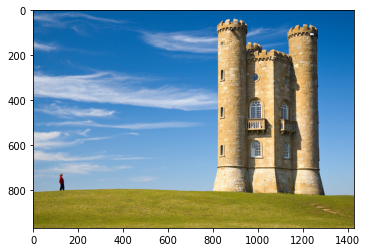

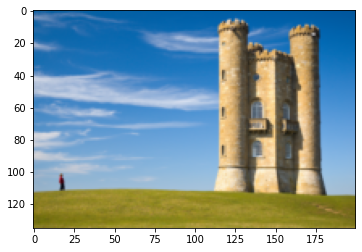

In [109]:
im = get_image(IM_PATH)
visualize(im)

# We should resize the image beforehand so we don't wait long
DOWNSIZE_WIDTH = 200
width = im.shape[1]
if width > DOWNSIZE_WIDTH:
    im = resize(im, width=DOWNSIZE_WIDTH)
        
visualize(im)

 Let's look first at how you could resize an image naively. We construct an image graph, where
- We will have a node for each pixel of the image and the data it contains will be its x position (the start and end node contain -1 and -2 respectively).
- We introduce an imaginary start node that is connected to all the nodes that represent the pixels in the top row of the image. 
- Likewise, all bottom-row pixels are connected to the imaginary end node.
- Each pixel is connected to 3 pixels in the row below it - the ones with x-values equal, one less and one more than the x value of it. Each connection is set to be of a special weight computed by finding the `gradient` of the image. You don't need to know how to do this.

For more information, have a look at https://en.wikipedia.org/wiki/Seam_carving#Computing_seams

The below function repeatedly removes the 10th column of the image until it is of the size we want.

In [110]:
def remove_10th_column(start, end):
    seam_idxs = []
    seam_idxs.append(start.data_to_remember)
    current_node, _ = start.neighbours[10]
    while current_node is not end:
        seam_idxs.append(current_node.data_to_remember)
        current_node, _ = current_node.neighbours[1] if len(current_node.neighbours) > 1 else current_node.neighbours[0]
    seam_idxs.append(current_node.data_to_remember)
    return seam_idxs

Run the below function. Change `dx`, `dy` to either remove or add seams (horizontally and vertically respectively), set `visalise_seams` to True to see each seam found or to False to just see the final result. 

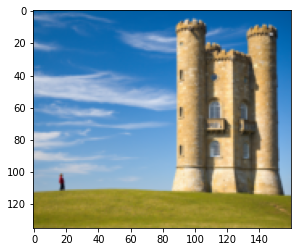

In [112]:
# TODO: Replace remove_10th_line with your solution
output = seam_carve(im, dy=0, dx=-40, visalise_seams=False, seam_function=dijkstra)
visualize(output)
save_image(output, OUTPUT_NAME)

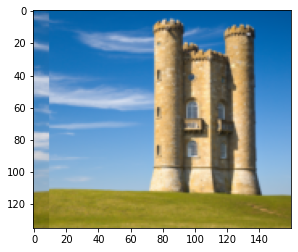

In [114]:
output = seam_carve(im, dy=0, dx=-40, visalise_seams=False, seam_function=remove_10th_column)
visualize(output)
save_image(output, OUTPUT_NAME)

As you can see, the result isn't great - the place where the edit happened is very obvious and we deleted the person from the picture. Replace the `remove_10th_line` function with your implementation of `dijkstra` and observe the results.

Feel free to play around with this - if you provide it with another image, it will still work!